In [1]:
from langchain_groq import ChatGroq
import os 
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API"] = os.getenv("GROQ_API")
os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = os.getenv("LANGSMITH_TRACING")
os.environ["LANGSMITH_PROJECT"] = os.getenv("LANGSMITH_PROJECT")



In [3]:
llm = ChatGroq(groq_api_key=os.getenv("GROQ_API"), model_name="Gemma2-9b-It")

In [5]:
from typing import Annotated
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph , START , END 
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):  # Graph builder state
    messages = Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [8]:
graph_builder.add_node("chatbot", chatbot)

In [9]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)


In [10]:
graph = graph_builder.compile() 

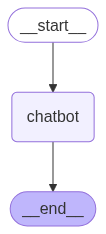

In [17]:
from IPython.display import display , Image 
display (Image(graph.get_graph().draw_mermaid_png()))   

In [22]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x763e577d3980>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x763e577e65d0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [23]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

KeyError: 'messages'